Image dimensions:  (256, 256, 3)


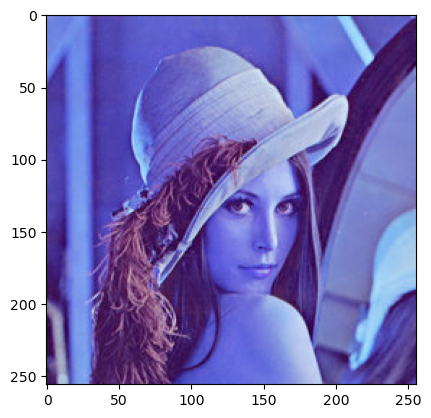

In [16]:
# READ AN IMAGE
# pip install opencv-python
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('images/Lena_RGB.png')
print('Image dimensions: ', np.shape(img))

plt.imshow(img,cmap='gray')
plt.show()

Blue


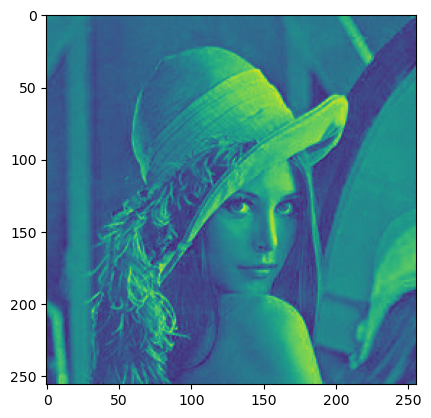

Green


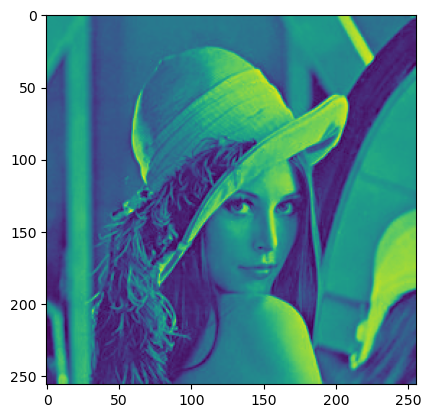

Red


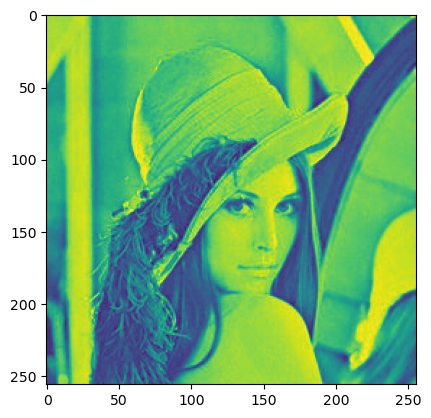

In [14]:
# Extraer por separado la imagen de grises de cada canal
# Por defecto openCV abre en BGR no en RBG, hay que invertir los canales
R = img[:,:,2]
G = img[:,:,1]
B = img[:,:,0]
canales=['Blue','Green','Red']
for i in range(3):
    plt.imshow(img[:,:,i])
    print(canales[i])
    plt.show()

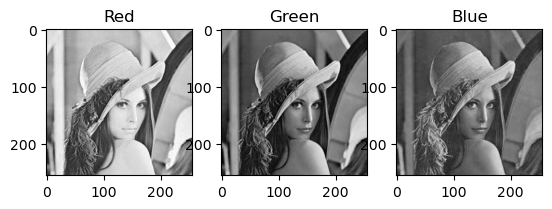

In [10]:
# Visualizar los canales en un subplot
fig, ax = plt.subplots(1,3)
ax[0].imshow(R, cmap='gray'), ax[0].set_title('Red')
ax[1].imshow(G, cmap='gray'), ax[1].set_title('Green')
ax[2].imshow(B, cmap='gray'), ax[2].set_title('Blue')
plt.show()

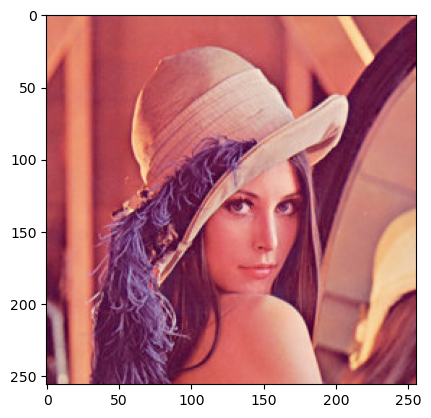

In [13]:
# Convertir BGR en RGB
#Imagen de serie
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img, cmap='gray')
plt.show()

### TRANSFORMACIONES DE INTENSIDAD

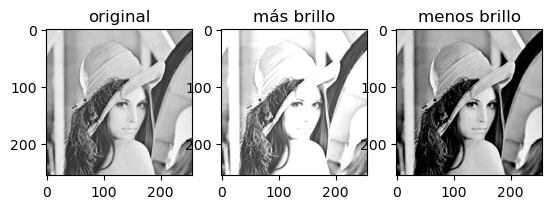

In [15]:
# CAMBIO DE BRILLO
img = cv2.imread('images/Lena_RGB.png')
img = img[:,:,2] # red color

mas_brillo = 50
menos_brillo = -100
mas_brillo_img = cv2.add(img, mas_brillo) # Importante el "cv2.add" en vez de "+"
menos_brillo_img = cv2.add(img, menos_brillo)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mas_brillo_img, cmap='gray'), ax[1].set_title('más brillo')
ax[2].imshow(menos_brillo_img, cmap='gray'), ax[2].set_title('menos brillo')
plt.show()

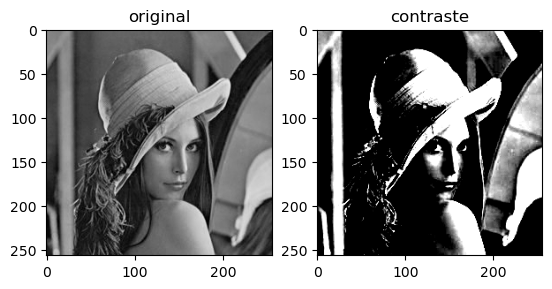

In [18]:
# CAMBIO DE CONTRASTE de acuerdo con el programa GIMP
img = cv2.imread('images/Lena_RGB.png')
img = img[:,:,1] # canal verde

contraste = +100

f = 131*(contraste + 127)/(127*(131-contraste))
alpha_c = f
gamma_c = 127*(1-f)

contrast_img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255), ax[0].set_title('original')
ax[1].imshow(contrast_img, cmap='gray', vmin=0, vmax=255), ax[1].set_title('contraste')
plt.show()

### CONVERSIONES DEL ESPACIO DE COLOR

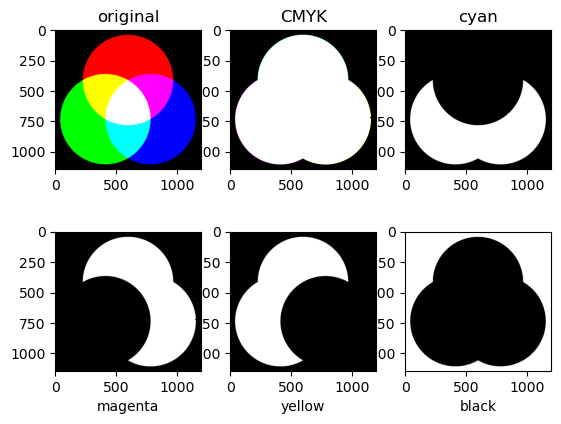

In [20]:
# RGB to CMYK
import numpy as np
from skimage import io

img = io.imread('images/colores.png') #La abre en RGB
rgb = img.copy()
rgb_p = rgb.astype('uint8')/255

with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(rgb_p, axis=2)
    # Extrae los canales de acuerdo con la ecuación del power point
    C = (1-rgb_p[:,:,0] - K)/(1-K)
    M = (1-rgb_p[:,:,1] - K)/(1-K)
    Y = (1-rgb_p[:,:,2] - K)/(1-K)

CMYK = (np.dstack((C,M,Y,K))*255).astype('uint8')
C,M,Y,K = cv2.split(CMYK)

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(img, cmap='gray'), ax[0,0].set_title('original')
ax[0,1].imshow(CMYK.astype('uint8'), cmap='gray'), ax[0,1].set_title('CMYK')
ax[0,2].imshow(C.astype('uint8'), cmap='gray'), ax[0,2].set_title('cyan')
ax[1,0].imshow(M.astype('uint8'), cmap='gray'), ax[1,0].set_xlabel('magenta')
ax[1,1].imshow(Y.astype('uint8'), cmap='gray'), ax[1,1].set_xlabel('yellow')
ax[1,2].imshow(K.astype('uint8'), cmap='gray'), ax[1,2].set_xlabel('black')
plt.show()

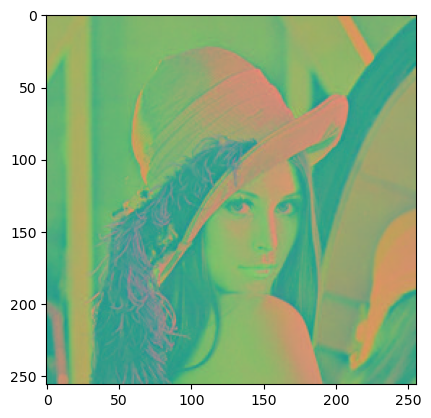

In [25]:
# Otras conversiones

img = cv2.imread('images/Lena_RGB.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray-scale

HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # (H)ue, (S)aturation and (V)alue

Lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # (L)uminosidad, a-b colores complementarios

YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # Y-Luma, Cr-Cb crominancia rojo y azul

plt.imshow(YCrCb,cmap='gray')
plt.show()

### TRANSFORMACIONES GEOMÉTRICAS

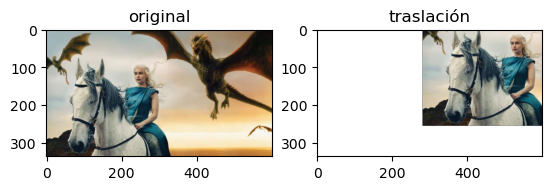

In [29]:
# TRASLACIÓN
img = io.imread('images/GOT.png')
rows, cols, ch = img.shape
 
M = np.float32([[1,0,280],[0,1,-80]]) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('traslación')
plt.show()

(337, 600, 4)


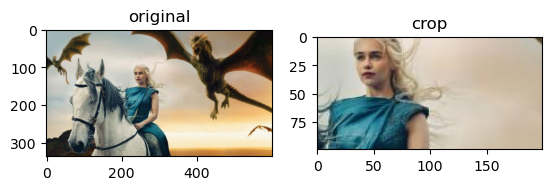

In [59]:
# CROPPING
img = io.imread('images/GOT.png')
print(img.shape)

new_img = img[100:200,200:400]

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('crop')
plt.show()

In [ ]:
# ROTACIÓN
img = io.imread('images/GOT.png')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=2) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('rotación')
plt.show()

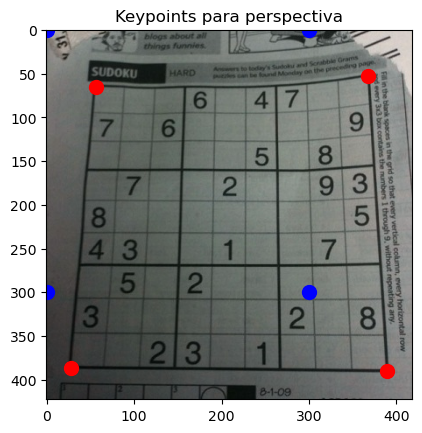

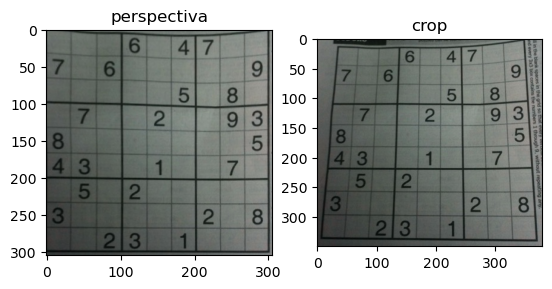

In [60]:
# PERSPECTIVA
img = cv2.imread('images/sudoku.png')
rows, cols, ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

plt.imshow(img, cmap='gray')
for i in range(0,4):
    plt.plot(pts1[i,0], pts1[i,1], 'or', markersize=10)
    plt.plot(pts2[i,0], pts2[i,1], 'ob', markersize=10)
plt.title('Keypoints para perspectiva')
plt.show()
 
M = cv2.getPerspectiveTransform(pts1,pts2) # Defino la matriz de transformación
pers = cv2.warpPerspective(img,M,(305,305)) # Aplico la transformación
crop =  img[50:400,20:400]

figs, ax = plt.subplots(1,2)
ax[0].imshow(pers, cmap='gray'), ax[0].set_title('perspectiva')
ax[1].imshow(crop, cmap='gray'), ax[1].set_title('crop')
plt.show()


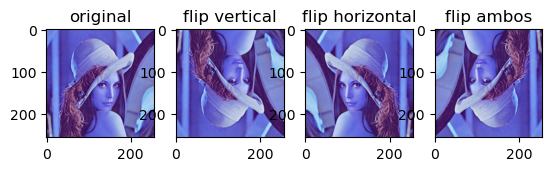

In [62]:
# FLIPPING

# Leer la imagen "Lena_RGB.png" en formato RGB
img = cv2.imread('images/Lena_RGB.png')

# Voltear la imagen para conseguir las siguientes transformaciones. Utiliza el método "cv2.flip()"
  
flipVertical = cv2.flip(img, 0)  # 0 para volteo vertical
flipHorizontal = cv2.flip(img, 1)
flipBoth = cv2.flip(img, -1)
 
figs, ax = plt.subplots(1,4)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(flipVertical, cmap='gray'), ax[1].set_title('flip vertical')
ax[2].imshow(flipHorizontal, cmap='gray'), ax[2].set_title('flip horizontal')
ax[3].imshow(flipBoth, cmap='gray'), ax[3].set_title('flip ambos')
plt.show()